# Importing libraries

In [16]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

# Read the data
Print the number of classes in case of multi-class classifier

Print the shape, and column datatypes

In [17]:
df = pd.read_csv('IRIS.csv')
[m, n] = df.shape
num_labels = df.iloc[:, -1].unique().size
print('no. of classes ', num_labels)
print('\nrows x cols',m, n), print('\ndatatypes\n',df.dtypes)

no. of classes  3

rows x cols 150 5

datatypes
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


(None, None)

# Plot each column to visualize the data

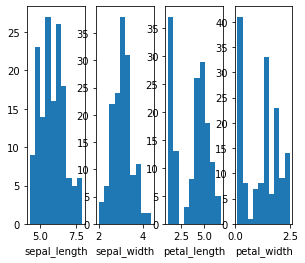

In [18]:
for i in range(1, n):     # n represents no. of features or independent variables
    plt.subplot(1, n, i)
    plt.hist(df.iloc[:, i - 1])
    plt.xlabel(df.columns[i - 1])
plt.show()

# Separate independent & dependent variables

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# print(X), print(y)

# Encode the dependent variable

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# print(y)

# Split training & test data

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizing the independent variables

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# print(x_train.shape,x_test.shape)

# Training the Logistic Regression Model on training data

In [23]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Test the model on training data

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_train = classifier.predict(x_train)
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))

[[39  0  0]
 [ 0 34  3]
 [ 0  2 42]]
0.9583333333333334


# Test the model on test data

In [26]:
y_pred_test = classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred_test))
print(accuracy_score(y_test,y_pred_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0
